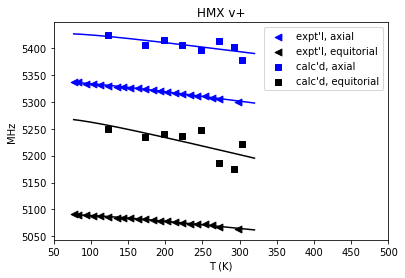

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def lmap(func, li):
  return list(map(func, li))

f = open('hmx-data.txt','r').readlines()[2:]

# rip the temperatures from every other line
exptT                   = lmap(float, [ line.split()[0] for line in f ][::2])
# v+ for the two sites, axial is higher in frequency
expt_vplus_axial        = lmap(float, [ line.split()[1] for line in f ][0::2])
expt_vplus_equitorial   = lmap(float, [ line.split()[1] for line in f ][1::2])

# v- for the two sites respectively
expt_vminus_axial       = lmap(float, [ line.split()[2] for line in f ][0::2])
expt_vminus_equitorial  = lmap(float, [ line.split()[2] for line in f ][1::2])

# asymmetry parameter for the two sites
expt_eta_axial          = lmap(float, [ line.split()[3] for line in f ][0::2])
expt_eta_equitorial     = lmap(float, [ line.split()[3] for line in f ][1::2])

# coupling constants for the two sites
expt_cq_axial           = lmap(float, [ line.split()[4] for line in f ][0::2])
expt_cq_equitorial      = lmap(float, [ line.split()[4] for line in f ][1::2])


# GIPAW values here??
calcT                = [ 123,    173,    198,    223,    248,    273,    293,  303    ]

calc_cq_axial        = [ 6218.1,  6213.4,  6222.4,  6225.1,   6237.6,  6233.2, 0 ] # NEED THESE
calc_cq_equitorial   = [ 6076.9,  6081.4,  6083.6,  6095.1,   6088.1,  6104.2, 0  ] # NEED THESE

calc_eta_axial       = [.51103, .50995, .50811, .5076,   .50852,  .50189, .50603, 0   ]
calc_eta_equitorial  = [.47346, .47237, .47316, .47615,  .47132,  .47091, .46757, 0   ]

calc_vplus_axial     = [5424.66, 5405.50, 5415.06, 5404.99, 5396.33, 5412.55, 5402.31, 5378.33]
calc_vplus_equitorial= [5249.64, 5235.23, 5239.50, 5236.75, 5247.59, 5186.55, 5174.77, 5221.10]

def fitF(a,b,c,T):
  return a+b*T+c/T

def fitExpAxial(T):
  return fitF(5359.89, -.187026, -736.26, T)

def fitCalcAxial(T):
  return fitF(5449.70, -.179950, -736.20, T)

def fitExpEquit(T):
  return fitF(5111.39, -0.14666, -789.502, T)

def fitCalcEquit(T):
  return fitF(5306.01, -0.33600, -1013.63, T)

dom = np.linspace(77,320,150)
expr_fit_ax = [ fitExpAxial(item)  for item in dom ]
calc_fit_ax = [ fitCalcAxial(item) for item in dom ]
expr_fit_eq = [ fitExpEquit(item)  for item in dom ]
calc_fit_eq = [ fitCalcEquit(item) for item in dom ]

def main():

  #beta = unichr(0x3b2).encode('utf-8')
  beta = 'beta'
  title = "HMX v+"
  plt.scatter(exptT[:-12], expt_vplus_axial[:-12],      marker='<', color='b', s=46, label='expt\'l, axial')
  plt.scatter(exptT[:-12], expt_vplus_equitorial[:-12], marker='<', color='k', s=46, label='expt\'l, equitorial')
  plt.scatter(calcT, calc_vplus_axial,      marker="s", color='b', s=46, label='calc\'d, axial')
  plt.scatter(calcT, calc_vplus_equitorial, marker="s", color='k', s=46, label='calc\'d, equitorial')
  plt.plot(dom, expr_fit_ax, color='b')
  plt.plot(dom, calc_fit_ax, color='b')
  plt.plot(dom, expr_fit_eq, color='k')
  plt.plot(dom, calc_fit_eq, color='k')
  plt.title(title)
  plt.xlabel("T (K)")
  plt.ylabel("MHz")
  plt.xlim( (50, 500))
  plt.legend(loc=1)
  plt.savefig('hmx.pdf', format='pdf')
  plt.show()

if __name__ == '__main__':
  main()